# Visual Q&A Demo

## Setup
1-Adds required packages to Julia.   
2-Downloads sample data and a pretrained model. 

In [49]:
for p in ("Knet","JLD","JSON","Images","WordTokenizers")
    Pkg.installed(p) == nothing && Pkg.add(p)
end
using Images,JLD,Knet,WordTokenizers
global atype = gpu()<0 ? Array{Float32}:KnetArray{Float32}
include("demosetup.jl")

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
2-Loads the pretrained model.   

In [51]:
include("src/newmacnetwork.jl")
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,wrun,r,_,p = loadmodel("models/macnet.jld";onlywrun=true);
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype,wrun);
end;

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [60]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = feats[:,:,:,rnd:rnd]
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=p);
answer==prediction

true

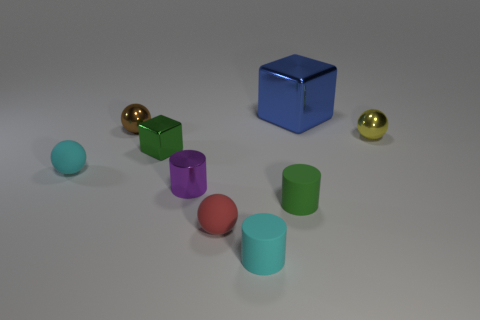

In [64]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [67]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: What color is the ball that is to the left of the red object and in front of the brown sphere ?
Answer: cyan
Prediction: cyan 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [29]:
userinput = readline(STDIN)
words = tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=p);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> how many object are there ?
Question: how many object are there ?
Prediction: 4


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

top-3 words:
("ball", "44.24")
("and", "31.26")
("the", "5.67")
image with attention map:


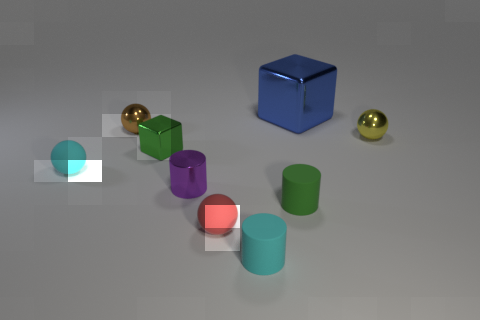

top-3 words:
("in", "8.79")
("of", "7.81")
("left", "7.37")
image with attention map:


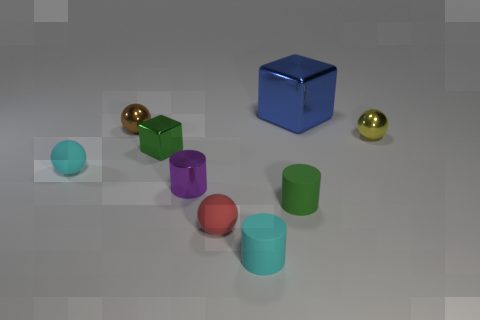

top-3 words:
("the", "20.30")
("brown", "12.19")
("of", "11.96")
image with attention map:


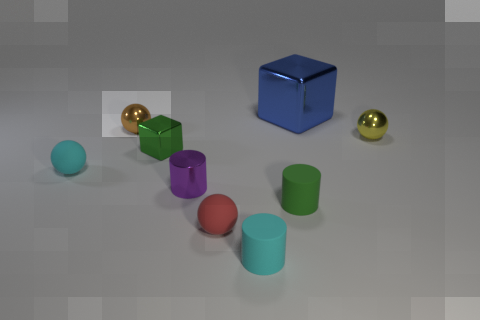

top-3 words:
("left", "15.26")
("the", "8.55")
("that", "7.71")
image with attention map:


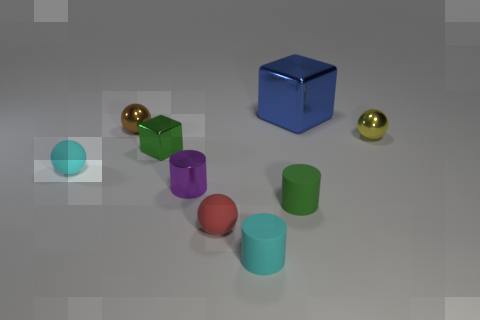

top-3 words:
("the", "30.18")
("ball", "29.23")
("and", "21.64")
image with attention map:


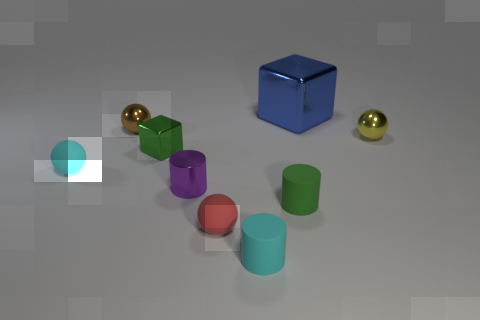

top-3 words:
("of", "9.91")
("in", "8.68")
("the", "8.47")
image with attention map:


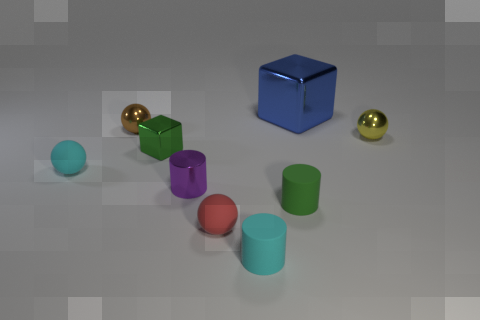

top-3 words:
("?", "17.25")
("the", "10.88")
("color", "8.65")
image with attention map:


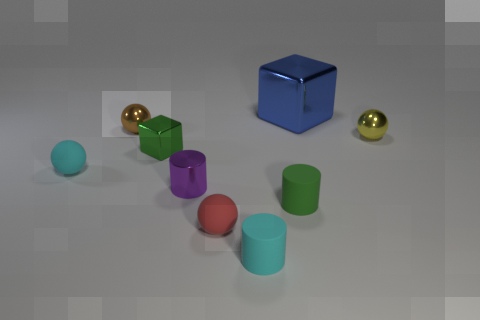

top-3 words:
("brown", "22.45")
("the", "22.17")
("?", "13.26")
image with attention map:


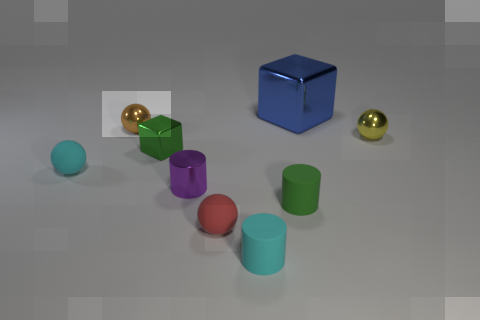

top-3 words:
("the", "22.24")
("of", "15.48")
("red", "14.06")
image with attention map:


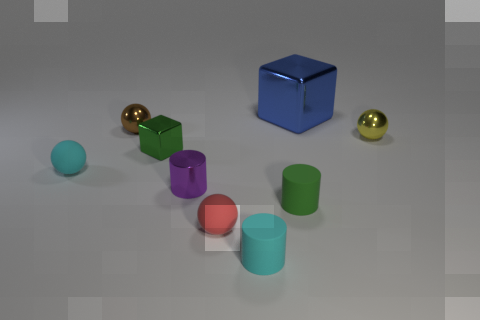

top-3 words:
("the", "37.81")
("brown", "31.69")
("the", "13.07")
image with attention map:


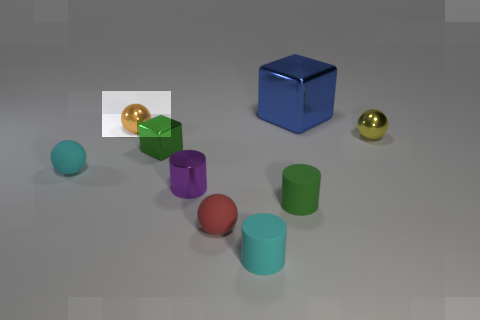

top-3 words:
("red", "52.83")
("object", "15.57")
("the", "11.82")
image with attention map:


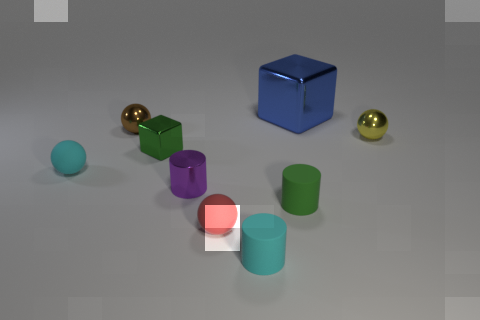

top-3 words:
("ball", "52.49")
("and", "33.15")
("the", "7.48")
image with attention map:


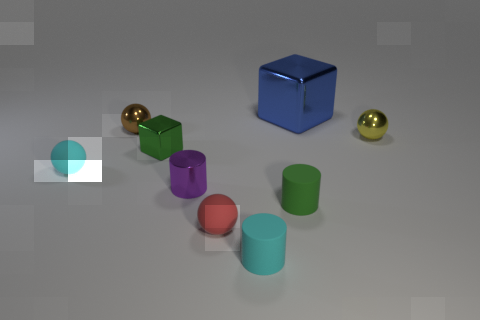

In [68]:
visualize(img,results;p=p)